# Sensitivity Analysis (using feature scoring)
To evaluate the robustness of the conclusions and how sensitive the model is to specific inputs, a global sensitivity analysis is performed. This resorts to the feature scoring method of the EMA workbench. 

This analysis is performed over 625 scenarios with 10 replications each. They assumed the percentage-competitive of the population to be 10% and no policy to be implemented (baseline). Finally, the runs were simulated over a period of 30 days. This is a different time from the notel experiments and results but it is considered to be enough to measure the state of the system and the sensitivity of the model.


## Feature Scoring
Feature scoring is a machine-learning alternative to global sensitivity analysis and can be used to get insight into the relative inﬂuence of the various uncertainfactors on model outcomes (Kwakkel, 2013)


### Sampled parameters:
- impact-long-queues    -  _taking the values of: [3,4,5,6,7]_
- initial-covid-cases  -  _taking the values of: [1,2,3,4,5]_
- threshold-competitive -  _taking the values of: [30,40,50,60,70]_
- service-timeSA        -  _taking the values of: [2,3,4,5,6]_

### Outcomes of interest:
__1. Queuing dynamics__
- average time in queue 
- min_queuingtime
- max_queuingtime

__2. Infection dynamics:__
- nr COVID cases at the end 
- nr cases before food distribution (day 7)
- nr cases after food distribution + incubation period (day 13)



### Steps:
1. structure data in experiments and outcomes 
2. run analysis
3. visualize feature scoring matrix


In [1]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import random
from ema_workbench.analysis import feature_scoring


### Data Structuring

Dividing the results into _experiments_ and _outcomes_

In [2]:
# Load the new .csv file 

results_df = pd.read_csv("SA_cleanresults3.csv")   # make sure to be in the same folder as this notebook 
results_df.head()

,Unnamed: 0,threshold-competitive,impact-long-queues,initial-corona-number,service-timeSA,policy-implemented,time-slot?,percentage-competitive,cum-infected,average-timequeue,min-timequeue,max-timequeue,cum-infected-10080,cum-infected-18720
0,0,30,3,1,2,policy 0 (baseline),False,10,214,70.840909,1,237,6,34
1,1,30,3,1,2,policy 0 (baseline),False,10,426,74.696721,1,301,3,46
2,2,30,3,1,2,policy 0 (baseline),False,10,256,155.721591,1,397,3,33
3,3,30,3,1,2,policy 0 (baseline),False,10,273,102.113636,1,312,6,36
4,4,30,3,1,2,policy 0 (baseline),False,10,36,108.482954,1,309,3,6


In [38]:
# rename the column names 
results_df.columns = ['scenario', 'threshold-competitive', 'impact-long-queues', 'initial-covid-cases', 'service-time', 'policy-implemented', 
             'time-slot?', 'percentage-competitive','total-infected-day30', 'average-timequeue', 'min-timequeue', 'max-timequeue', 'total-infected-beforedistribution', 'total-infected-afterdistribution']

In [44]:
# Define experiments (simply choosing the respective columns from the dataframe)
experiments =  results_df[[ 'scenario', 'threshold-competitive','impact-long-queues', 'initial-covid-cases', 'service-time']]

In [45]:
# Similarly, get the outcomes 
cols_to_select = ['min-timequeue', 'average-timequeue', 'min-timequeue', 'max-timequeue',  'total-infected-beforedistribution', 'total-infected-afterdistribution', 'total-infected-day30']
outcomes_dict = {}
for col in cols_to_select:
    
    outcomes_dict[col] = np.array(results_df[col])
outcomes_dict

{'min-timequeue': array([1, 1, 1, ..., 5, 5, 5], dtype=int64),
 'average-timequeue': array([ 70.84090909,  74.69672131, 155.7215909 , ..., 676.1477273 ,
        641.8011364 , 675.4488636 ]),
 'max-timequeue': array([ 237,  301,  397, ..., 1245, 1232, 1266], dtype=int64),
 'total-infected-beforedistribution': array([ 6,  3,  3, ..., 19, 18, 21], dtype=int64),
 'total-infected-afterdistribution': array([ 34,  46,  33, ..., 202, 121, 117], dtype=int64),
 'total-infected-day30': array([214, 426, 256, ..., 770, 611, 625], dtype=int64)}

In [46]:
outcomes = outcomes_dict

### Feature Scoring Analysis


In [47]:
# Perform analysis using EMA workbench 
fs = feature_scoring.get_feature_scores_all(experiments, outcomes)

### Visualization 

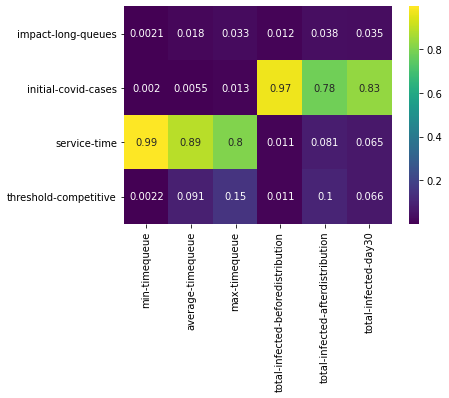

<Figure size 648x792 with 0 Axes>

In [48]:
## here I can visualize it 


fig1 = sns.heatmap(fs, cmap='viridis', annot=True)
plt.show()
plt.figure(figsize=(9, 11))
figure = fig1.get_figure()    
figure.savefig("FeatureScoring_V1.svg", bbox_inches = 'tight')

<span style='color:green'> What kind of comments can I take from this? </span>

1. There is a clear division between queue and infection dynamics. 

2. The number of initial covid cases has a very high effect on the number of cases along time (main driver). This suggests that this variable is very important when looking into containing the outbreak. This variable, as expected, has negligible impact on the queuing outcomes of interest 

3. However, we cant really control much of the initial covid cases (but can try to be aware of it with testing and understand if it is already too late to make decisions and stuff)

4. Similarly, while the queuing outcomes of interest have a high sensitviity to the service-time, this variable barely impacts the number of covid cases along time     
* (This goes in line with the results observed in the experiments that policies implemented at the food distribution level do not seem to have a high impact over time -- do I mean this?)

4. The threshold-competitive shows limited (but some) impact on both dynamics (max-timeinqueue and total-infected-afterdistribution)

5. Finally, The model shows no sensitivity to the variable impact-long-queues

6. But matrix shows relative impact so we are going to perform a new one without the two main sensitivities


* Mention that this was conducted in a scenario with 10% competitive and policy 0 implemented (baseline). This choice will already influence the impact of the others (whole thing with global SA. so the values are biased and could be different in other situations)

In [9]:
#### Repeat sensitivity analysis with only threshold-competitive and impact-long-queues and show how it is different

"Since all models are wrong the scientist must be alert to what is importantly wrong. It is inappropriate to be concerned about mice when there are tigers abroad." George Box, 1976.

In [49]:
# Defining the new experiments now 
experiments1 =  results_df[[ 'scenario', 'threshold-competitive','impact-long-queues']]


In [50]:
# Conducting a new analysis 
fs = feature_scoring.get_feature_scores_all(experiments1, outcomes)

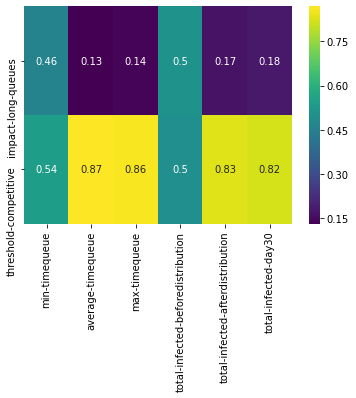

<Figure size 648x792 with 0 Axes>

In [51]:
# Showing the new visualization 
fig1 = sns.heatmap(fs, cmap='viridis', annot=True)
plt.show()
plt.figure(figsize=(9, 11))
figure = fig1.get_figure()    
figure.savefig("FeatureScoring_V2.svg", bbox_inches = 'tight')

<span style='color:green'> What kind of comments can I take from this? </span>

1. Not regarding the other two, the feature scoring shows that the threshold-competitive is larger driver of those outcomes of interest more than the impact of long queues

2. If we are still at an intiial stage of the infection, it can be relevant to look into the queuing part. in specific to look into the threshold-competitive and try to maintain it as high as possible (making people behaving cooperatevily,) , info campgains, example of calais and food and clothes


3. "model is sensitive to the condition of the system" 

* "Why worry about mice when you have tigers around" 



In [ ]:
##### maybe the problem is also KPIS.. so now i will disaggregate the population adn the time component
## instead of looking at the PEOPLE, i look at the coope and the compt 